# **ADIDAS US SALES ANALYSIS**

In [1]:
# LIBRARIES
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Load the data
adidas = pd.read_csv("Adidas US Sales Datasets.csv")
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [3]:
print('Dataset shape: ', adidas.shape)

Dataset shape:  (9648, 13)


In [4]:
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'])
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [5]:
print('Adidas Data datatypes: \n', adidas.dtypes)

Adidas Data datatypes: 
 Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit              object
Units Sold                  object
Total Sales                 object
Operating Profit            object
Operating Margin            object
Sales Method                object
dtype: object


In [6]:
# Duplicates
print(f'Number of duplicates in the dataset: ({adidas.duplicated().sum()}), ({100*adidas.duplicated().sum()})%')

Number of duplicates in the dataset: (0), (0)%


In [7]:
# Check Cardinality
print('Cardinality of the Adidas dataset: \n', adidas.select_dtypes(include=object).nunique())

Cardinality of the Adidas dataset: 
 Retailer               6
Region                 5
State                 50
City                  52
Product                6
Price per Unit        94
Units Sold           361
Total Sales         3138
Operating Profit    4187
Operating Margin      66
Sales Method           3
dtype: int64


In [8]:
# Checking for missing values

missing = (adidas.isnull().sum()).to_frame().rename(columns={0:'Number of Missing Values'})
missing['% of Missing Values'] = round((100*adidas.isnull().sum()/len(adidas)),1)
print('Missing values in adidas dataset\n', missing)

Missing values in adidas dataset
                   Number of Missing Values  % of Missing Values
Retailer                                 0                  0.0
Retailer ID                              0                  0.0
Invoice Date                             0                  0.0
Region                                   0                  0.0
State                                    0                  0.0
City                                     0                  0.0
Product                                  0                  0.0
Price per Unit                           0                  0.0
Units Sold                               0                  0.0
Total Sales                              0                  0.0
Operating Profit                         0                  0.0
Operating Margin                         0                  0.0
Sales Method                             0                  0.0


In [9]:
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [10]:
# Strip the operating margin column
adidas['Operating Margin'] = adidas['Operating Margin'].str.rstrip('%').astype(float)/100
adidas = adidas.rename(columns={'Operating Margin' : 'Operating Margin(%)'})
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin(%),Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",0.42,Outlet


In [11]:
# Convert columns to int/float

columns = ['Price per Unit', 'Total Sales', 'Operating Profit']

adidas[columns] = adidas[columns].replace('[\$,]', '', regex=True).astype(float)
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin(%),Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1378.0,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.0,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1235.0,0.42,Outlet


In [12]:
adidas['Units Sold'] = adidas['Units Sold'].replace(',', '', regex=True).astype(float)
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin(%),Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,0.42,Outlet


In [13]:
columns = ['Price per Unit', 'Total Sales', 'Operating Profit', 'Units Sold']

new_column_names = [col+'($)' for col in columns]
adidas = adidas.rename(columns=dict(zip(columns, new_column_names), inplace=True))

In [14]:
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit($),Units Sold($),Total Sales($),Operating Profit($),Operating Margin(%),Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,0.42,Outlet


In [15]:
adidas.dtypes

Retailer                       object
Retailer ID                     int64
Invoice Date           datetime64[ns]
Region                         object
State                          object
City                           object
Product                        object
Price per Unit($)             float64
Units Sold($)                 float64
Total Sales($)                float64
Operating Profit($)           float64
Operating Margin(%)           float64
Sales Method                   object
dtype: object

In [16]:
# Retailer
adidas['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [24]:
retailer_sales = adidas.groupby(['Retailer'])['Total Sales($)'].sum().reset_index().sort_values(by='Total Sales($)', ascending=False)
retailer_sales

,Retailer,Total Sales($)
5,West Gear,242964333.0
1,Foot Locker,220094720.0
3,Sports Direct,182470997.0
2,Kohl's,102114753.0
0,Amazon,77698912.0
4,Walmart,74558410.0


In [38]:
def bar_plot(df, column):
    sns.set(style='darkgrid')

    colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'gray', 'brown', 'teal', 'cyan']

    plt.figure(figsize=(12, 6))
    plt.subplot(121)  # Bar plot

    plt.bar(df[column], df['Total Sales($)'], color=colors)

    # Customize the plot

    plt.xlabel('Retailer')
    plt.ylabel('Total Sales')
    plt.title(f'Total Sales by {column}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Create the pie chart
    plt.subplot(122)  # Pie chart
    plt.pie(df['Total Sales($)'], labels=df[column], colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Total Sales Distribution')

    # Show the plot
    plt.tight_layout()
    plt.show()

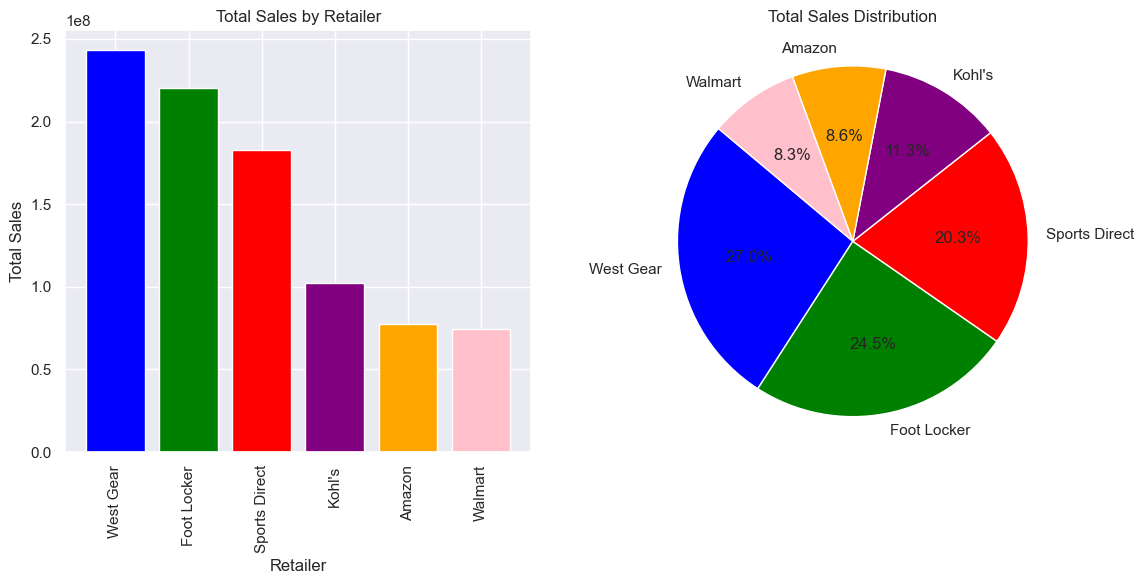

In [39]:
bar_plot(retailer_sales, 'Retailer')

**Based on retailers, the West Gear has the most total sales with 27% followed by Foot Locker 24.5%.<br> Walmart and Amazon have the least sales.**

In [40]:
# Grouping by products
products = adidas.groupby(['Product'])['Total Sales($)'].sum().reset_index().sort_values(by='Total Sales($)', ascending=False)
products

,Product,Total Sales($)
2,Men's Street Footwear,208826244.0
3,Women's Apparel,179038860.0
1,Men's Athletic Footwear,153673680.0
5,Women's Street Footwear,128002813.0
0,Men's Apparel,123728632.0
4,Women's Athletic Footwear,106631896.0


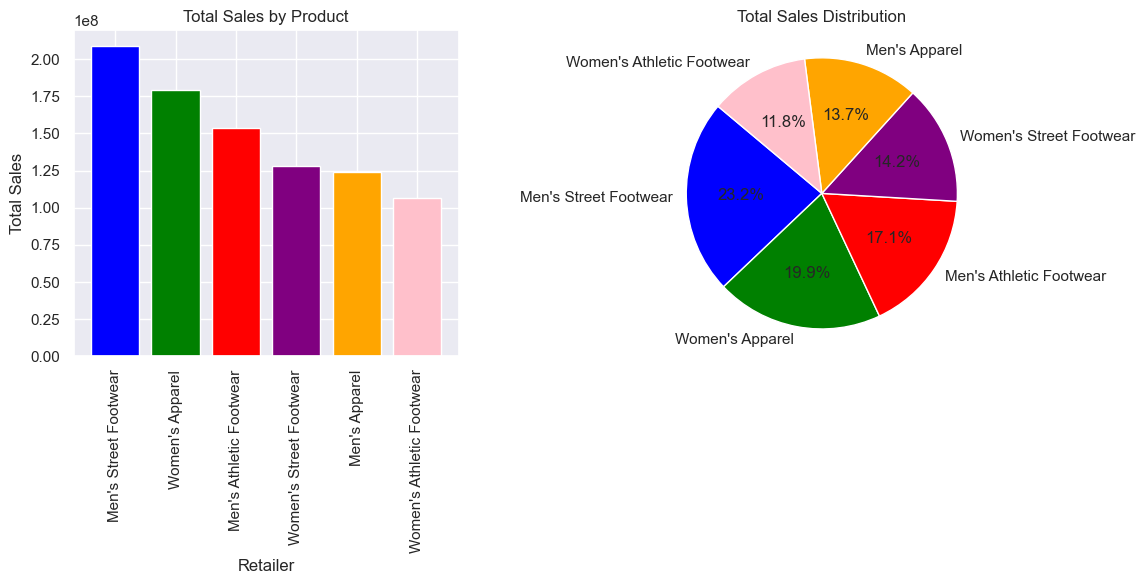

In [41]:
bar_plot(products, 'Product')

**The men's street footwear has high sales with 23.2% of the total sales followed by the Women's Apparel 19.9%.<br> The Women's Athletic Footwear has the least sales.**

In [42]:
regions = adidas.groupby(['Region'])['Total Sales($)'].sum().reset_index().sort_values(by='Total Sales($)', ascending=False)
regions

,Region,Total Sales($)
4,West,269943182.0
1,Northeast,186324067.0
3,Southeast,163171236.0
2,South,144663181.0
0,Midwest,135800459.0


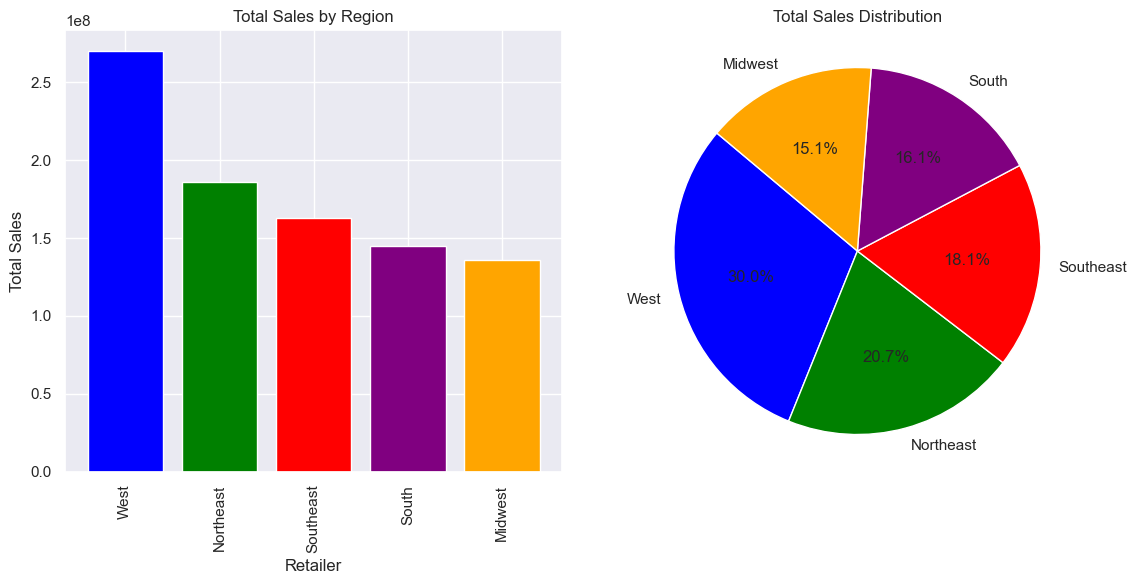

In [44]:
bar_plot(regions, 'Region')

**The West region has the high sales of 30.0% and the lowest region being the MidWest with 15.1%.**

In [21]:
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit($),Units Sold($),Total Sales($),Operating Profit($),Operating Margin(%),Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,0.42,Outlet


In [20]:
adidas['Retailer ID'].unique()

array([1185732, 1197831, 1128299, 1189833], dtype=int64)